**Brian Blaylock**  
**March 6, 2019**

# HRRR-GLM Map For Single Day

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, get_hrrr_variable, get_hrrr_all_valid
from BB_HRRR.HRRR_GLM_LTNG_Hit_Percentage import get_HRRR_LTNG_hit_rate

import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [4]:
m = draw_HRRR_map()

In [15]:
Hlats, Hlons = get_hrrr_latlon(DICT=False)

-----

# Specify Date and Parameters

In [3]:
DATE = datetime(2018, 5, 14, 22) # Mallard Fire

In [14]:
# Download the cooresponding HRRR files
HH = get_hrrr_all_valid(DATE, 'LTNG:entire', fxx=range(19))

In [3]:
# Get the GLM Verification Data
a, (files, expected) = get_HRRR_LTNG_hit_rate(DATE)

Looking in these file paths for the nearest datetime
   /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180514/20/
   /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180514/21/
   /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180514/22/
---------------------------------------------------
    Date Requested: 2018-05-14 21:30:00
  Nearest GLM file: 2018-05-14 21:30:00
---------------------------------------------------
 Window == +/- 30 Minutes
 Window DATES ==  2018-05-14 21:00:00 2018-05-14 22:00:00
    first observation: 2018-05-14 21:00:00
     last observation: 2018-05-14 22:00:00
  Returning data from 180 GLM files (expected 180)
---------------------------------------------------

 GLM Download Timer: 0:00:03.390005

 HRRR Download Timer: 0:00:03.416458
Total GLM observations: 77053
----------------------------------------------
GLM Observations in each region:
    HRRR	:	41,974
    West	:	5,151
    Central	

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Created Contours for HRRR
Created Contours for West
Created Contours for Central
Created Contours for East
Created Contours for Utah
...done!

-->>  Utah (F09): 100.0% Complete (59 of 59 contour areas)
Timer -- points_inside_contours():  0:01:30.519996

!!! Timer: count GLM flashes inside HRRR contours: 0:01:35.691250


In [38]:
a['HRRR']['HRRR LTNG'].keys()

dict_keys(['Flash Inside', 'Hit Rate', 'False Alarm', 'Total Area km2'])

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Domain 	 Hit R 	 False 	 Total LTNG Area (km2) 	 hitflashes/km2
HRRR 	 35.2% 	 44.4% 	 614510.0728173229 	 0.024022388977809873
West 	 26.1% 	 47.9% 	 197963.58994145054 	 0.07456926803745068
Cent 	 41.9% 	 33.0% 	 217390.49584114936 	 0.06790545254925415
East 	 41.4% 	 59.9% 	 175342.954252383 	 0.08418929670109272
Utah 	 4.1% 	 58.6% 	 18182.70481793618 	 0.8118704091504662


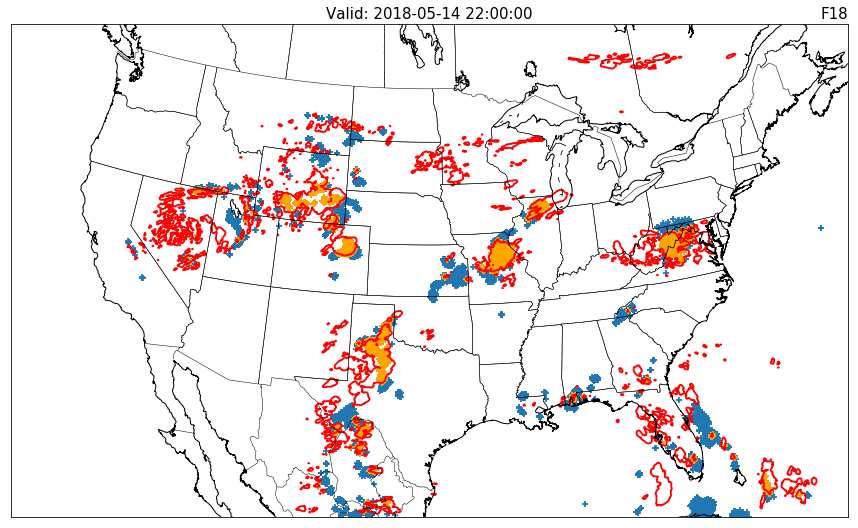

In [64]:
domain = 'HRRR'

plt.figure(figsize=(15,15))

fxx = 18

flash_boolean = a[domain]['HRRR LTNG']['Flash Inside'][fxx]

m.contour(Hlons, Hlats, HH[fxx].data, levels=[0], colors='r', latlon=True)
m.scatter(a[domain]['longitude'], a[domain]['latitude'], marker='+', latlon=True)
m.scatter(a[domain]['longitude'][flash_boolean], a[domain]['latitude'][flash_boolean], marker='+', latlon=True, c='orange')
m.drawcoastlines()
m.drawstates()
m.drawcountries()
plt.title('Valid: %s' % (DATE))
plt.title('F%02d' % (fxx), loc='right')

print('Domain \t Hit R \t False \t Total LTNG Area (km2) \t hitflashes/km2')
for i in a.keys():
    hitflash_per_area = sum(flash_boolean)/a[i]['HRRR LTNG']['Total Area km2'][fxx]
    print('%s \t %.1f%% \t %.1f%% \t %s \t %s' % (i[:4], a[i]['HRRR LTNG']['Hit Rate'][fxx]*100, a[i]['HRRR LTNG']['False Alarm'][fxx]*100, a[i]['HRRR LTNG']['Total Area km2'][fxx], hitflash_per_area))

In [59]:
str(DATE)

'2018-05-14 22:00:00'

In [25]:
a[i].keys()

dict_keys(['latitude', 'longitude', 'energy', 'area', 'CONTOURS', 'HRRR LTNG'])